# Covid

## Contexto

La enfermedad por coronavirus (COVID-19) es una enfermedad infecciosa causada por un coronavirus recién descubierto. La mayoría de las personas infectadas con el virus COVID-19 experimentarán una enfermedad respiratoria leve a moderada y se recuperarán sin necesidad de tratamiento especial. Las personas mayores y aquellas con problemas médicos subyacentes como enfermedades cardiovasculares, diabetes, enfermedades respiratorias crónicas y cáncer tienen más probabilidades de desarrollar una enfermedad grave.

Durante todo el curso de la pandemia, uno de los principales problemas que han enfrentado los proveedores de atención médica es la escasez de recursos médicos y un plan adecuado para distribuirlos eficientemente. En estos tiempos difíciles, poder predecir qué tipo de recurso podría necesitar un individuo en el momento de dar positivo en la prueba o incluso antes de eso será de inmensa ayuda para las autoridades, ya que podrían adquirir y organizar los recursos necesarios para salvar la vida de ese paciente.

## Objetivo

El objetivo principal de este proyecto es construir un modelo de aprendizaje automático que, dada la sintomatología actual, el estado y la historia médica de un paciente con Covid-19, prediga si el paciente está en alto riesgo o no.

El conjunto de datos fue proporcionado por el gobierno mexicano . Este conjunto de datos contiene una enorme cantidad de información relacionada con pacientes anonimizados, incluidas las precondiciones. El conjunto de datos sin procesar consta de 21 características únicas y 1.048.576 pacientes únicos. En las características booleanas, 1 significa “sí” y 2 significa “no”. Los valores 97 y 99 son datos faltantes.

- sexo: 1 para mujer y 2 para hombre.
- edad: del paciente.
- clasificación: hallazgos de la prueba de covid. Los valores 1-3 significan que el paciente fue diagnosticado con covid en diferentes grados. 4 o más significa que el paciente no es portador de covid o que la prueba es inconclusa.
- tipo de paciente: tipo de atención que recibió el paciente en la unidad. 1 para regresó a casa y 2 para hospitalización.
- neumonía: si el paciente ya tiene inflamación de los sacos de aire o no.
- embarazo: si el paciente está embarazada o no.
- diabetes: si el paciente tiene diabetes o no.
- EPOC: Indica si el paciente tiene enfermedad pulmonar obstructiva crónica o no.
- asma: si el paciente tiene asma o no.
- inmsupr: si el paciente está inmunosuprimido o no.
- hipertensión: si el paciente tiene hipertensión o no.
- cardiovascular: si el paciente tiene enfermedad relacionada con el corazón o los vasos sanguíneos.
- renal crónica: si el paciente tiene enfermedad renal crónica o no. otra
- enfermedad: si el paciente tiene otra enfermedad o no.
- obesidad: si el paciente es obeso o no.
- tabaco: si el paciente es fumador o no.
- usmr: Indica si el paciente recibió atención médica de unidades de primer, segundo o tercer nivel.
- unidad médica: tipo de institución del Sistema Nacional de Salud que brindó la atención.
- intubado: si el paciente estuvo conectado al ventilador.
- uci: Indica si el paciente había sido admitido en una Unidad de Cuidados Intensivos.
- fecha de defunción: si el paciente falleció, indique la fecha de defunción y 9999-99-99 en caso contrario


In [31]:
%pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [32]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
from pycaret.classification import *
from pycaret.regression import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

## Limpiar datos

In [34]:
data = pd.read_csv('./CovidData.csv')
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [36]:
data.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [37]:
data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

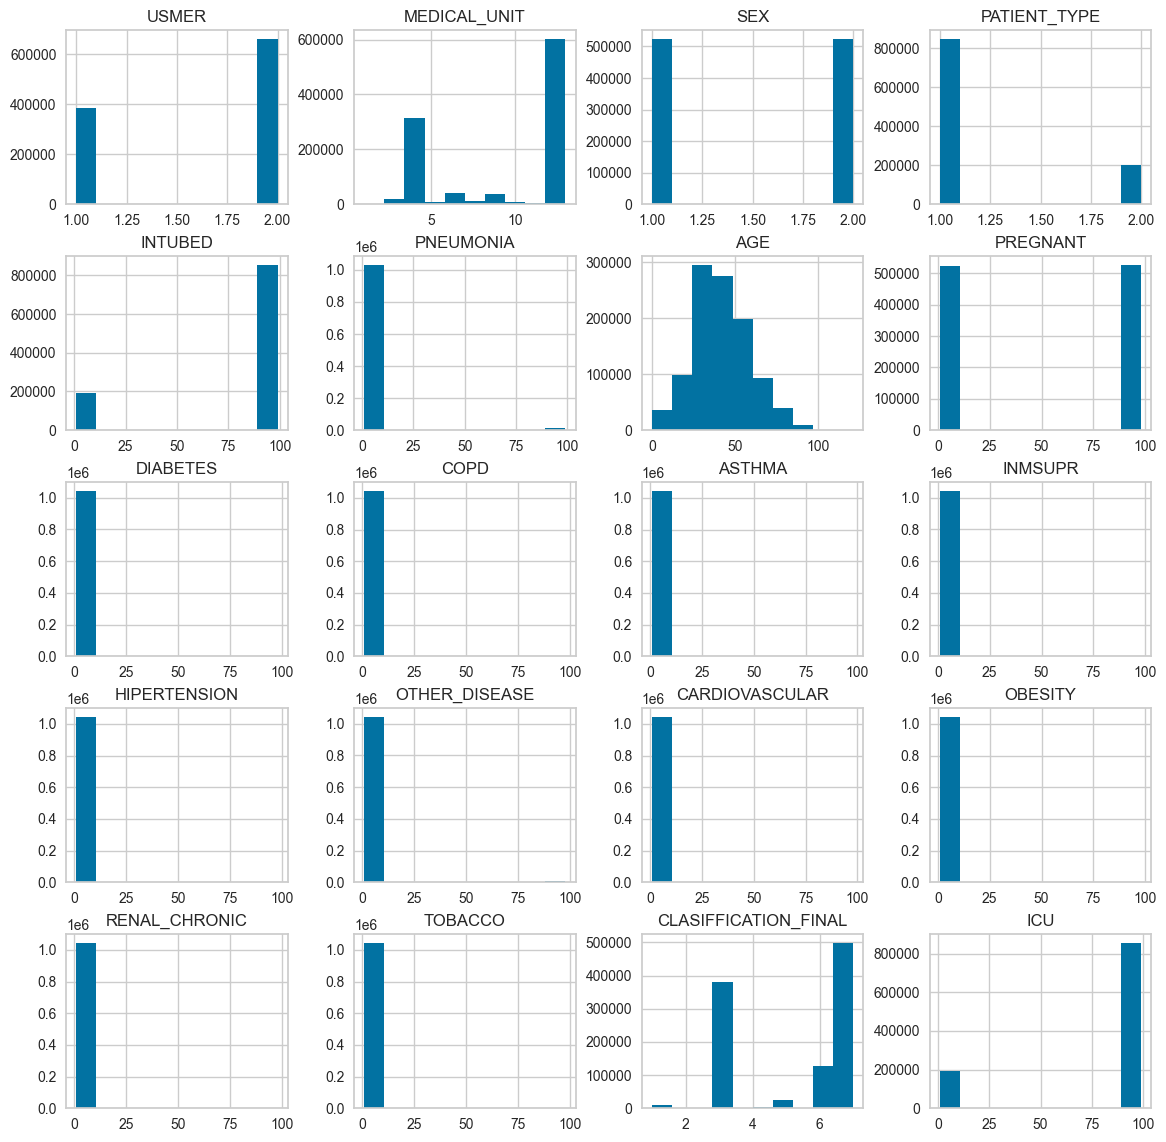

In [38]:
data.hist(bins = 10 , figsize= (14,14))
plt.show()

In [39]:
data.drop(columns=["DATE_DIED"], inplace=True)

In [40]:
data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [41]:
data['SEX'].value_counts()

1    525064
2    523511
Name: SEX, dtype: int64

In [42]:
data['SEX'].replace({1:'Female', 2:'Male'}, inplace = True)

In [43]:
data.groupby(['SEX', 'PREGNANT'])['PREGNANT'].count()

SEX     PREGNANT
Female  1             8131
        2           513179
        98            3754
Male    97          523511
Name: PREGNANT, dtype: int64

In [44]:
data['PREGNANT'].replace({97 : 0, 98 : np.nan}, inplace = True)

In [45]:
data.groupby(['SEX', 'PREGNANT'])['PREGNANT'].count()

SEX     PREGNANT
Female  1.0           8131
        2.0         513179
Male    0.0         523511
Name: PREGNANT, dtype: int64

In [46]:
data['PREGNANT'].isnull().sum()

3754

In [47]:
data['USMER'].replace(2.0, 0, inplace=True)
data['SEX'].replace(2.0, 0, inplace=True)
data['PATIENT_TYPE'].replace(2.0, 0, inplace=True)
data['INTUBED'].replace(2.0, 0, inplace=True)
data['PNEUMONIA'].replace(2.0, 0, inplace=True)
data['PREGNANT'].replace(2.0, 0, inplace=True)
data['DIABETES'].replace(2.0, 0, inplace=True)
data['COPD'].replace(2.0, 0, inplace=True)
data['ASTHMA'].replace(2.0, 0, inplace=True)
data['INMSUPR'].replace(2.0, 0, inplace=True)
data['HIPERTENSION'].replace(2.0, 0, inplace=True)
data['OTHER_DISEASE'].replace(2.0, 0, inplace=True)
data['CARDIOVASCULAR'].replace(2.0, 0, inplace=True)
data['OBESITY'].replace(2.0, 0, inplace=True)
data['RENAL_CHRONIC'].replace(2.0, 0, inplace=True)
data['TOBACCO'].replace(2.0, 0, inplace=True)
data['ICU'].replace(2.0, 0, inplace=True)

In [48]:
data['TOBACCO'].value_counts()

0     960979
1      84376
98      3220
Name: TOBACCO, dtype: int64

In [49]:
data['PATIENT_TYPE'].replace({1:'hospitalized', 0:'not hospitalized'}, inplace = True)

In [50]:
data['PATIENT_TYPE'].value_counts()

hospitalized        848544
not hospitalized    200031
Name: PATIENT_TYPE, dtype: int64

In [51]:
data.replace([97,98, 99], np.nan, inplace = True)

In [52]:
data.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                  3754
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

Vamosa a eliminar las columnas con un 80% o más de fallo

In [53]:
data.drop(columns=["INTUBED","ICU"], inplace=True)

In [54]:
data.isnull().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
PNEUMONIA               16003
AGE                       345
PREGNANT                 3754
DIABETES                 3338
COPD                     3003
ASTHMA                   2979
INMSUPR                  3404
HIPERTENSION             3104
OTHER_DISEASE            5045
CARDIOVASCULAR           3076
OBESITY                  3032
RENAL_CHRONIC            3006
TOBACCO                  3220
CLASIFFICATION_FINAL        0
dtype: int64

In [55]:
# Rellenamos valores nulos

fill_list = data['PNEUMONIA'].dropna()
data['PNEUMONIAe'] = data['PNEUMONIA'].fillna(
    pd.Series(np.random.choice(
        fill_list , size = len(data.index))))

fill_list = data['AGE'].dropna()
data['AGE'] = data['AGE'].fillna(
    pd.Series(np.random.choice(
        fill_list , size = len(data.index))))

fill_list = data['PREGNANT'].dropna()
data['PREGNANT'] = data['PREGNANT'].fillna(
    pd.Series(np.random.choice(
        fill_list , size = len(data.index))))

fill_list = data['DIABETES'].dropna()
data['DIABETES'] = data['DIABETES'].fillna(
    pd.Series(np.random.choice(
        fill_list , size = len(data.index))))

fill_list = data['COPD'].dropna()
data['COPD'] = data['COPD'].fillna(
    pd.Series(np.random.choice(
        fill_list , size = len(data.index))))

fill_list = data['ASTHMA'].dropna()
data['ASTHMA'] = data['ASTHMA'].fillna(
    pd.Series(np.random.choice(
        fill_list , size = len(data.index))))

fill_list = data['INMSUPR'].dropna()
data['INMSUPR'] = data['INMSUPR'].fillna(
    pd.Series(np.random.choice(
        fill_list , size = len(data.index))))

fill_list = data['HIPERTENSION'].dropna()
data['HIPERTENSION'] = data['HIPERTENSION'].fillna(
    pd.Series(np.random.choice(
        fill_list , size = len(data.index))))

fill_list = data['OTHER_DISEASE'].dropna()
data['OTHER_DISEASE'] = data['OTHER_DISEASE'].fillna(
    pd.Series(np.random.choice(
        fill_list , size = len(data.index))))

fill_list = data['CARDIOVASCULAR'].dropna()
data['CARDIOVASCULAR'] = data['CARDIOVASCULAR'].fillna(
    pd.Series(np.random.choice(
        fill_list , size = len(data.index))))

fill_list = data['OBESITY'].dropna()
data['OBESITY'] = data['OBESITY'].fillna(
    pd.Series(np.random.choice(
        fill_list , size = len(data.index))))

fill_list = data['RENAL_CHRONIC'].dropna()
data['RENAL_CHRONIC'] = data['RENAL_CHRONIC'].fillna(
    pd.Series(np.random.choice(
        fill_list , size = len(data.index))))

fill_list = data['TOBACCO'].dropna()
data['TOBACCO'] = data['TOBACCO'].fillna(
    pd.Series(np.random.choice(
        fill_list , size = len(data.index))))

data.isnull().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
PNEUMONIA               16003
AGE                         0
PREGNANT                    0
DIABETES                    0
COPD                        0
ASTHMA                      0
INMSUPR                     0
HIPERTENSION                0
OTHER_DISEASE               0
CARDIOVASCULAR              0
OBESITY                     0
RENAL_CHRONIC               0
TOBACCO                     0
CLASIFFICATION_FINAL        0
PNEUMONIAe                  0
dtype: int64

In [56]:
data.dropna(subset=['PNEUMONIA'],inplace=True)
data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
PNEUMONIAe              0
dtype: int64

***Ahora no tenemos valores nulos***

## Clasificación

In [57]:
reg = setup(data,target='CLASIFFICATION_FINAL', train_size = 0.7, n_jobs=1)

,Description,Value
0,Session id,4522
1,Target,CLASIFFICATION_FINAL
2,Target type,Regression
3,Original data shape,"(1032572, 19)"
4,Transformed data shape,"(1032572, 19)"
5,Transformed train set shape,"(722800, 19)"
6,Transformed test set shape,"(309772, 19)"
7,Ordinal features,2
8,Numeric features,16
9,Categorical features,2


In [58]:
# compare_models()

In [59]:
# best = compare_models()[0]
# print(best)

In [60]:
# print(best)

In [61]:
# best_model = create_model(best)

In [62]:
model = create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6715,3.3023,1.8172,0.0749,0.3287,0.4216
1,1.6691,3.2920,1.8144,0.0783,0.3280,0.4207
2,1.6731,3.3042,1.8177,0.0775,0.3292,0.4230
3,1.6718,3.3008,1.8168,0.0771,0.3288,0.4223
4,1.6720,3.2988,1.8163,0.0749,0.3283,0.4212
5,1.6735,3.3074,1.8186,0.0749,0.3293,0.4229
6,1.6703,3.2959,1.8155,0.0738,0.3280,0.4202
7,1.6720,3.3068,1.8185,0.0754,0.3295,0.4235
8,1.6696,3.2873,1.8131,0.0807,0.3281,0.4211


In [63]:
# print(best_model)

In [64]:
tuned_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6735,3.3036,1.8176,0.0745,0.3287,0.4220
1,1.6706,3.2942,1.8150,0.0777,0.3282,0.4211
2,1.6740,3.3047,1.8179,0.0774,0.3292,0.4232
3,1.6727,3.3015,1.8170,0.0769,0.3288,0.4225
4,1.6729,3.2999,1.8166,0.0746,0.3284,0.4214
5,1.6751,3.3105,1.8195,0.0740,0.3294,0.4233
6,1.6709,3.2972,1.8158,0.0735,0.3281,0.4203
7,1.6730,3.3080,1.8188,0.0751,0.3296,0.4239
8,1.6702,3.2885,1.8134,0.0804,0.3282,0.4215


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [I

In [65]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [66]:
# predict_model(tuned_model, data=data)

In [67]:
# hacer predicciones en un conjunto de datos de prueba
predictions = predict_model(tuned_model, data=data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1.6684,3.2892,1.8136,0.0790,0.3282,0.4211


In [70]:
print(predictions)

         USMER  MEDICAL_UNIT     SEX      PATIENT_TYPE  PNEUMONIA   AGE  \
0            0             1  Female      hospitalized        1.0  65.0   
1            0             1    Male      hospitalized        1.0  72.0   
2            0             1    Male  not hospitalized        0.0  55.0   
3            0             1  Female      hospitalized        0.0  53.0   
4            0             1    Male      hospitalized        0.0  68.0   
...        ...           ...     ...               ...        ...   ...   
1048570      0            13    Male      hospitalized        0.0  40.0   
1048571      1            13    Male  not hospitalized        0.0  51.0   
1048572      0            13    Male      hospitalized        0.0  55.0   
1048573      0            13    Male      hospitalized        0.0  28.0   
1048574      0            13    Male      hospitalized        0.0  52.0   

         PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  \
0             0.0       0.0   0

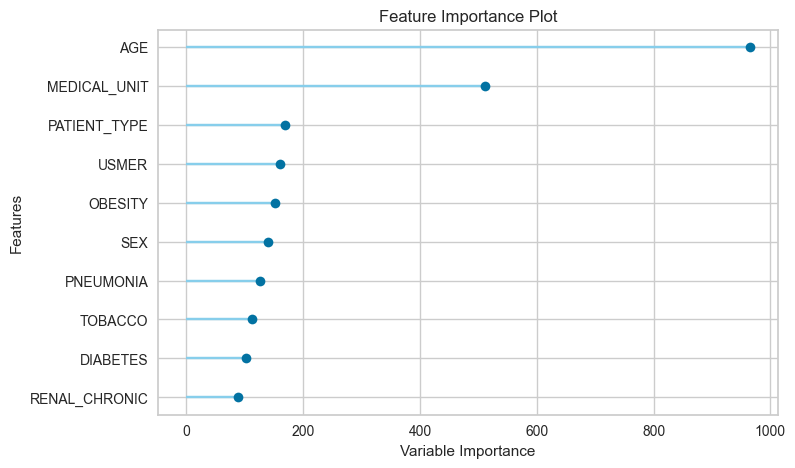

In [68]:
plot_model(tuned_model, plot = 'feature')

In [69]:
save_model(tuned_model, 'best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['USMER', 'MEDICAL_UNIT',
                                              'PNEUMONIA', 'AGE', 'PREGNANT',
                                              'DIABETES', 'COPD', 'ASTHMA',
                                              'INMSUPR', 'HIPERTENSION',
                                              'OTHER_DISEASE', 'CARDIOVASCULAR',
                                              'OBESITY', 'RENAL_CHRONIC',
                                              'TOBACCO', 'PNEUMONIAe'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapp...
                  TransformerWrapper(include=['SEX', 'PATIENT_TYPE'],
                                     transformer=OrdinalEncoder(cols=['SEX',
                                                                      'PATIENT_TYPE'],
               